### VAR Models

계량경제학(ECO2007)시간에서는 단변량 시계열에 대해서만 다룬다. 다변량 시계열을 다루는 모델을 배우고, 외생변수를 허용하는 확장된 모형에 대해서 알아보자

#### 1. Vector Process

**1.1 Weak Stationarity and Cross-Correlation Matrices**

k-dimensional time series $\mathbf{r} _t = [r_{1t}, \cdots, r_{kt}]^{'}$를 고려하자. 이들의 first, second moment가 시간에 영향을 받지 않는 시계열이면 weakly stationary하다고 한다. 특히, weakly stationary한 시계열의 Covariance matrix와 mean vector는 Constant 하다.
Weakly stationary time series $\mathbf{r} _t$가 있을 때, mean vector는
$$\mathbf{μ} = E(\mathbf{r} _t)$$
이고, Covariance matrix는
$$\mathbf{Γ} _0 = E[(\mathbf{r} _t - \mathbf{μ})(\mathbf{r} _t - \mathbf{μ})^{'}]$$
이다. 여기서 기대값은 $\mathbf{r} _t$의 joint distribution에서 추정된 것이다

#### example 1

pandas datareader로부터 데이터를 가져와 mean vector와 covariance matrix를 생성해 보자

In [1]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd

START_DATE = '2020-01-01'
END_DATE = pd.to_datetime('today')

samsung = pdr.DataReader("005930", "naver", START_DATE, END_DATE).astype(int)
kakao = pdr.DataReader("035720", "naver", START_DATE, END_DATE).astype(int)
hynics = pdr.DataReader("000660", "naver", START_DATE, END_DATE).astype(int)
LG = pdr.DataReader("003550", "naver", START_DATE, END_DATE).astype(int)

각 종목별 수익률을 계산해 줘야 한다

In [2]:
ret_samsung = samsung['Close'].pct_change().dropna()
ret_kakao = kakao['Close'].pct_change().dropna()
ret_hynics = hynics['Close'].pct_change().dropna()
ret_LG = LG['Close'].pct_change().dropna()

수익률이 계산되었으면, 하나의 Data Frame으로 결합해야 한다

In [3]:
matrix = pd.concat([ret_samsung, ret_kakao, ret_hynics, ret_LG], axis = 1)
matrix.columns = ['Samsung','Kakao','Hynics','LG']
matrix

,Samsung,Kakao,Hynics,LG
Date,,,,
2020-01-03,0.005435,0.000000,-0.002112,0.007027
2020-01-06,0.000000,0.013101,-0.002116,-0.001405
2020-01-07,0.005405,0.035601,-0.003181,0.013991
2020-01-08,0.017921,-0.003114,0.036170,-0.016543
2020-01-09,0.031690,0.028206,0.016427,-0.001410
...,...,...,...,...
2024-07-10,0.000000,0.007067,0.002096,-0.018270
2024-07-11,-0.002278,-0.009357,0.008368,0.013648
2024-07-12,-0.036530,-0.002361,-0.033195,-0.001224


`mean()` method에서 axis를 0으로 지정하여 계산하면 각 종목별 평균 수익률을 계산할 수 있다

In [4]:
matrix.mean(axis = 0)

Samsung    0.000542
Kakao      0.000550
Hynics     0.001077
LG         0.000410
dtype: float64

`cov()` method를 사용하면 DataFrame의 Covariance를 계산할 수 있다

In [5]:
matrix.cov()

,Samsung,Kakao,Hynics,LG
Samsung,0.000258,0.000146,0.000248,0.000147
Kakao,0.000146,0.000589,0.000185,0.000137
Hynics,0.000248,0.000185,0.000549,0.000170
LG,0.000147,0.000137,0.000170,0.000495


seaborn library에서 `heatmap()` 함수를 이용하면 시각화를 할 수 있다

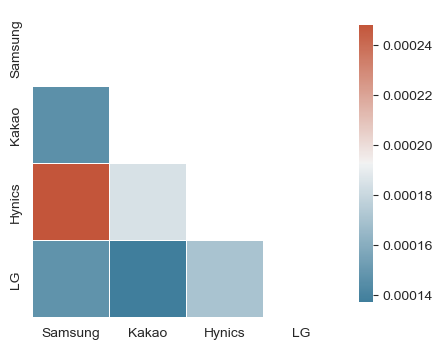

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

mask = np.triu(np.ones_like(matrix.cov(), dtype = bool))
f, ax = plt.subplots(figsize = (5, 4))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.grid(False)
sns.heatmap(matrix.cov(), mask = mask, cmap = cmap,
            square = True, linewidths = .5, cbar_kws = {"shrink": .9}, annot = True)
plt.show()

#### Exercise 1

종목을 직접 선정하여 pandas datareader로부터 데이터를 가져와 mean vector와 covariance matrix를 생성하라. 그리고 seaborn 라이브러리를 이용해 시각화하라. 무엇을 알 수 있는가?

In [7]:
# write your code here!

**1.2 Cross-Correlation**

행렬 $\mathbf{D}$를 $k \times k$ 크기의 대각행렬이라 가정하자. 즉, $\mathbf{D} = \mbox{diag}\{\sqrt{\Gamma_{11}(0)},\cdots,\sqrt{\Gamma_{kk}(0)}\}$이다. 다변량 수익률 행렬$\mathbf{r} _t$의 concurrent하고, lag가 0인 cross correlation matrix는 다음과 같이 정의된다

$$\mathbf{ρ}_0 = [\rho_{ij}(0)] = \mathbf{D^{-1}\Gamma_0D^{-1}}$$

여기서 행렬 $\mathbf{\rho}_0$의 $(i,j)$번째 원소는 다음과 같이 정의된다

$$\rho_{ij}(0) = \frac{ Γ_{ij}(0) }{\sqrt{Γ_{ii}(0) Γ_{jj}(0)}} = \frac{\mathrm{Cov(r_{it}, r_{jt})}}{\mathrm{std}(r_{it}) \mathrm{std}(r_{jt})}$$

이는 $r_{it}$와 $r_{jt}$ 사이의 correlation coefficient이기도 하다. 한편, multivariate time seires 분석에서 가장 중요한 주제는 바로 시계열간의 lead-lag relationship이다. cross-correlation matrices는 각 시계열들이 얼마나 선형 의존적(linear dependence)인지 측정하는 지표로 사용된다. 시차가 $l$인 cross covariance matrix는

$$\mathbf{Γ}_l = [Γ_{ij}(l)] = E[(\mathbf{r} _t - \mathbf{μ})(\mathbf{r} _{t-l} - \mathbf{μ})^{'}]$$
인데, cross-correlation matrix와는 다음과 같은 관계가 성립한다

$$\mathbf{ρ}_l = [\rho_{ij}(l)] = \mathbf{D^{-1}Γ_lD^{-1}}$$

정의에 의해,

$$\rho_{ij}(l) = \frac{Γ_{ij}(l)}{\sqrt{ Γ_{ii}(0)Γ_{jj}(0) }} = \frac{\mathrm{Cov}(r_{it}, r_{j,t-l})}{\mathrm{std}(r_{it})\mathrm{std}(r_{jt})}$$

한편, 조건부 수익률 $\{\mathbf{r}_t|t=1,\cdots,T\}$에서의 Sample Cross-Correlation Matrix는 다음과 같이 추정된다

$$\mathbf{\hat\Gamma}_l = \frac{1}{T}\sum_{t=l+1}^T (\mathbf{r} _t - \mathbf{\bar r})(\mathbf{r} _{t-l} - \mathbf{\bar r})^{'}, ~~~~~ l \geq 0$$

여기서 $\mathbf{\bar r} = \frac{\sum_{t=1}^T \mathbf{r}_t}{T}$ 은 vector of sample mean이다. sample cross-correlation matrix는 동일한 논리로 다음과 같이 추정된다

$$\mathbf{\hat \rho}_l = \mathbf{\hat D^{-1} \hat Γ_l \hat D^{-1}}, ~~~~~ l \geq 0$$

#### example 2

example 1에서 구한 종목 수익률 행렬에서 correlation matrix를 구해 보자

pandas DataFrame에서 `corr()` method를 사용하면 correlation matrix를 구할 수 있다

In [9]:
matrix.corr()

,Samsung,Kakao,Hynics,LG
Samsung,1.000000,0.375481,0.659428,0.412992
Kakao,0.375481,1.000000,0.324418,0.254456
Hynics,0.659428,0.324418,1.000000,0.326646
LG,0.412992,0.254456,0.326646,1.000000


마찬가지로 seaborn의 `heatmap()` 함수를 사용하여 시각화를 할 수 있다

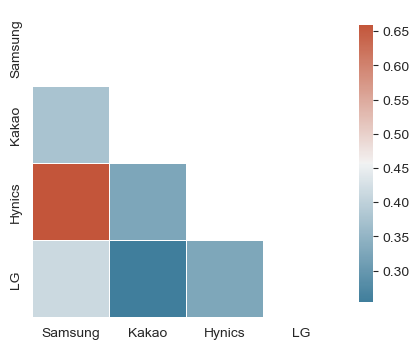

In [10]:
mask = np.triu(np.ones_like(matrix.cov(), dtype = bool))
f, ax = plt.subplots(figsize = (5, 4))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.grid(False)
sns.heatmap(matrix.corr(), mask = mask, cmap = cmap,
            square = True, linewidths = .5, cbar_kws = {"shrink": .9}, annot = True)
plt.show()

seaborn 라이브러리의 `pairplot()` 함수를 사용하면 다음과 같이 cross-correlation plot을 그릴 수 있다

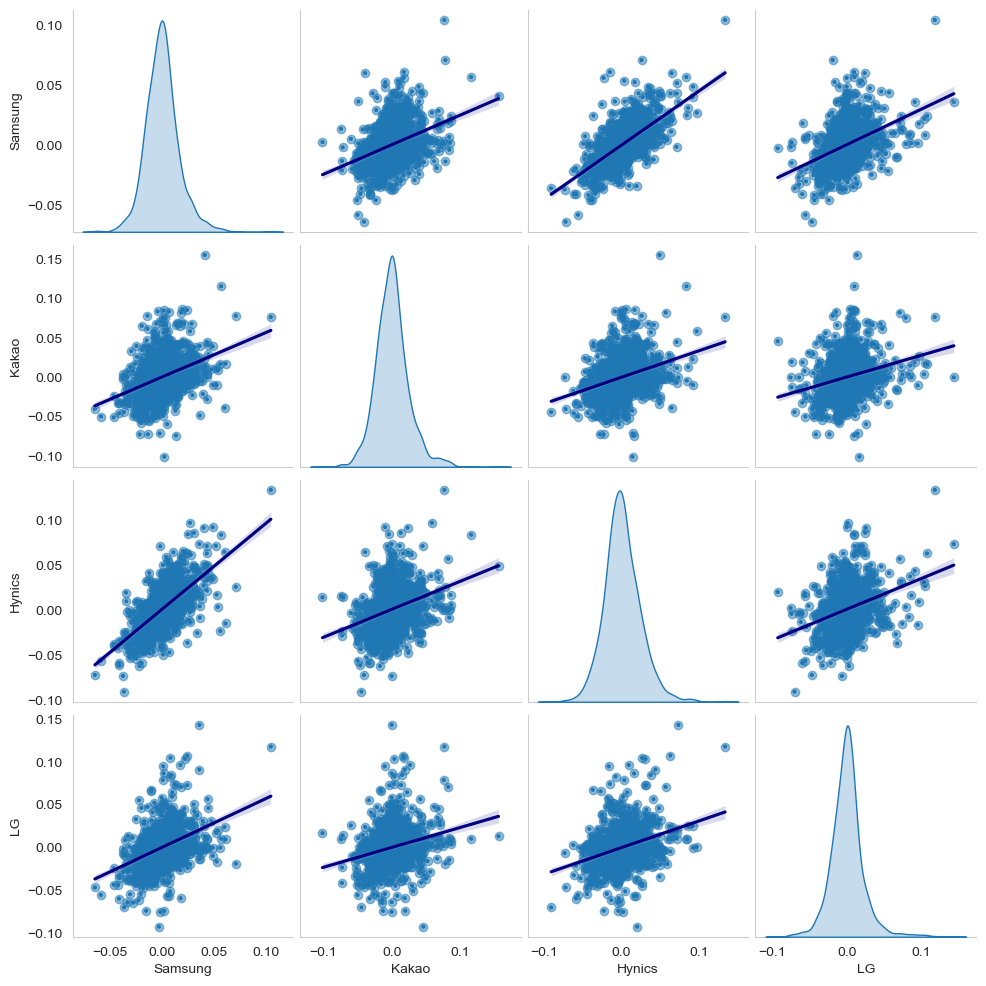

In [11]:
g = sns.pairplot(
    matrix, 
    plot_kws = {
        'edgecolor': 'none',
        'marker' : '.'
    }, 
    diag_kind = 'kde'
)
g.map_lower(
    sns.regplot, 
    ci = 90, 
    line_kws = {'color': 'navy'}, 
    scatter_kws = {'alpha': 0.5}
)
g.map_upper(
    sns.regplot, 
    ci = 90, 
    line_kws = {'color': 'navy'}, 
    scatter_kws = {'alpha': 0.5}
)

for ax in g.axes.flatten():
    if ax is not None:
        ax.grid(False)
        
plt.show()

#### Exercise 2

Exercise 1에서 구한 종목 수익률 행렬에서 correlation matrix를 구하라. 그리고 시각화하라. 무엇을 알 수 있는가?

In [12]:
# write your code here!

**1.3 Vector Autoregressive models**

multivairate time seires가 $\mathrm{VAR(1)}$ 모형을 따른다고 하자

$$\mathbf{r}_t = \mathbf{ϕ}_0 + \mathbf{Φr}_{t-1} + \mathbf{a}_t$$

$k=2$일 때 $\mathrm{VAR(1)}$ 모형은 다음 식을 따른다

$$r_{1t} = ϕ_{10} + ϕ_{11}r_{1,t-1} + ϕ_{12}r_{2,t-1} + a_{1t}$$
$$r_{2t} = ϕ_{20} + ϕ_{21}r_{1,t-1} + ϕ_{22}r_{2,t-1} + a_{2t}$$

**1.4 Stationarity Condition and Moments of a VAR(1) Model**

약정상성을 띄는 $\mathrm{VAR(1)}$을 고려하자. 여기서 오차항의 평균은 $E(\mathbf{a}_t) = \mathbf{0}$이다. 여기서 다음 식을 얻을 수 있다

$$E(\mathbf{r}_t) = \mathbf{\phi}_0 + \mathbf{\Phi}E(\mathbf{r}_{t-1})$$

$E(\mathbf{r}_t)$는 시간에 영향을 받지 않기 때문에, 다음과 같은 식을 알 수 있다

$$\mathbf{\mu} = E(\mathbf{r}_t) = (\mathbf{I} - \mathbf{\Phi})^{-1}\mathbf{\Phi}_0$$

$\mathbf{I-\Phi}$은 가역적이고, 여기서 $\mathbf{I}$는 $k \times k$의 항등행렬이다. $\mathbf{\phi}_0 = (\mathbf{I} - \mathbf{\Phi})\mathbf{\mu}$를 이용해, $\mathrm{VAR(1)}$모형은 다음과 같이 쓸 수 있다

$$(\mathbf{r_t} - \mathbf{\mu}) = \mathbf{\Phi}(\mathbf{r_{t-1}} - \mathbf{\mu})+\mathbf{a}_t$$

$\mathbf{\tilde r_t}(\mathbf{r_t} - \mathbf{\mu})$는 mean corrected time series이다. 이를 이용해 $\mathrm{VAR(1)}$ 모형을 다시 쓰면

$$\mathbf{\tilde r}_t = \mathbf{\Phi}\mathbf{ \tilde r}_{t-1} -\mathbf{a}_t$$

이다. 한편, 이 모형을 오차항에 대해서 다시 쓸 수 있는데, VAR(1) 모형은 VMA(q) 모형으로 바꿀 수 있다

$$\mathbf{\tilde r}_t = \mathbf{a}_t + \mathbf{\Phi}\mathbf{a}_{t-1} + \mathbf{\Phi}^2 \mathbf{a}_{t-2} + \mathbf{\Phi}^3 \mathbf{a}_{t-3} + \cdots$$

이는 VAR(1) process의 몇가지 특성을 보여주고 있다
1. $\mathbf{a}_t$는 시계열적으로 uncorrelate하기 때문에, $\mathrm{Cov}(\mathbf{a}_t, \mathbf{r}_{t-1}) = \mathbf{0}$이다
2. 적절한 변환을 취하여 생성한 공분산 $\mathrm{Cov}(\mathbf{r}_t, \mathbf{a}_t) = \mathbf{\Sigma}$이 존재한다
3. $\mathbf{r}_t$는 codfficient matrix $\mathbf{\Phi}^j$의 과거 오차 $\mathbf{a}_{t-j}$에 의존한다
4. Covariance matirx는 다음과 같다
$$\mathrm{Cov}(\mathbf{r}_t) = \mathbf{\Gamma}_0 = \mathbf{\Sigma} + \mathbf{\Phi}\mathbf{\Sigma}\mathbf{\Phi}^{'} + \mathbf{\Phi}^2\mathbf{\Sigma}(\mathbf{\Phi}^2)^{'} + \cdots = \sum_{i=0}^{\infty} \mathbf{\Phi}^i \mathbf{\Sigma}(\mathbf{\Phi}^i)^{'}$$

위 식에 $\mathbf{\tilde r^{'}_{t-l}}$을 곱한 뒤 평균을 구하고, 공분산을 계산하면 $\mathrm{Cov}(\mathbf{a}_t, \mathbf{r}_{t-j}) = E(\mathbf{a}_t \mathbf{\tilde r}^{'}_{t-j}) = \mathbf{0} ~~ \mbox{for} ~~ j>0$이다. 이를 통해 우리는 아래 식을 구할 수 있다

$$E(\mathbf{\tilde r_t \tilde r_{t-l}^{'}}) = \mathbf{\Phi} E(\mathbf{\tilde r_{t-1} \tilde r_{t-l}})^{'}, ~~~~~ l > 0$$

그러므로

$$\mathbf{\Gamma}_l = \mathbf{\Phi\Gamma}_{l-1}, ~~~~~ l>0$$

이다. 오른쪽 식의 행렬 앞 뒤로 $\mathbf{D}^{-1/2}$를 곱하면, 다음과 같이 Cross Correlation Matrix를 구할 수 있다

$$\mathbf{\rho}_l = \mathbf{\Upsilon}^l\mathbf{\rho}_{l-1}$$

**1.5 Vector AR(p) Models**

$\mathrm{VAR(1)}$ 모형을 일반화하면 다음과 같이 $\mathrm{VAR}(p)$ 모형으로 표현 가능하다

$$\mathbf{r}_t = \mathbf{\phi}_0 + \mathbf{\Phi}_1\mathbf{r}_{t-1} + ⋯ + \mathbf{Φ}_p \mathbf{r}_{t-p} + \mathbf{a}_t, ~~~~~ p>0$$

만약 시계열 $\mathbf{r}_t$가 weakly stationary 하다면,
$$\mathbf{μ} = E(\mathbf{r}_t) = (\mathbf{I} - \mathbf{\Phi}_1 - ⋯ - \mathbf{Φ}_p)^{-1}\mathbf{\phi}_0 = [\mathbf{Φ}(1)]^{-1}\mathbf{\phi}_0$$
이다. $\mathbf{\tilde r}_t = \mathbf{r}_t - \mathbf{μ}$이라고 하자. 그러면 $\mathrm{VAR}(p)$모형은 다음과 같이 표현할 수 있다

$$\mathbf{\tilde r}_t = \mathbf{Φ}_1 \mathbf{\tilde r}_{t-1} + ⋯ + \mathbf{Φ}_p \mathbf{\tilde r}_{t-p} + \mathbf{a}_t$$

CCM의 정의에 따라, moment equation은
$$\mathbf{ρ}_l = \mathbf{Υ}_1 \mathbf{ρ}_{l-1} + ⋯ + \mathbf{Υ}_p \mathbf{ρ}_{l-p}, ~~~~ \mbox{for  } l>0$$

#### example 3

2013년 1월부터 2024년 7월까지의 삼성전자와 미국 반도체섹터지수의 월별 수익률을 이용하여 $\mathrm{VAR}(1)$ 모형을 추정하라

yahoo finance 라이브러리를 활용하여 삼성전자 주식 종가와 semiconductor index(^SOX)를 가져온다

In [39]:
import yfinance as yf
START_DATE = '2012-12-01'

samsung = yf.download(
    '005930.KS',
    start = START_DATE,
    end = END_DATE,
    progress = False,
    interval = '1mo'
)
semi = yf.download(
    '^SOX',
    start = START_DATE,
    end = END_DATE,
    progress = False,
    interval = '1mo' # 1 month interval
)

월별 수익률을 계산해 준다

In [40]:
semi_mon_ret = semi['Close'].pct_change().dropna()
samsung_mon_ret = samsung['Close'].pct_change().dropna()

VAR(1) 모형을 추정하기 위해, 하나의 DataFrame으로 만들어 주는 것이 필요하다

In [41]:
matrix_mon = pd.concat(
    [
        semi_mon_ret,
        samsung_mon_ret
    ], 
    axis = 1
)
matrix_mon.columns = ['Semiconductor','Samsung']
matrix_mon

,Semiconductor,Samsung
Date,,
2013-01-01,0.074650,-0.048620
2013-02-01,0.033678,0.066298
2013-03-01,0.023510,-0.011010
2013-04-01,0.017634,-0.004584
2013-05-01,0.054618,0.011842
...,...,...
2024-03-01,0.037718,0.122616
2024-04-01,-0.047278,-0.059466
2024-05-01,0.096305,-0.051613


statsmodel의 `VAR()`함수를 사용하면 VAR 모형을 추정할 수 있다

In [42]:
from statsmodels.tsa.api import VAR

model = VAR(matrix_mon)
results = model.fit(1, trend = 'c')
results.summary()

/Users/junghunlee/anaconda3/envs/FinancialMachineLearning/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jul, 2024
Time:                     23:33:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.8728
Nobs:                     138.000    HQIC:                  -10.9484
Log likelihood:           373.381    FPE:                1.67001e-05
AIC:                     -11.0001    Det(Omega_mle):     1.59970e-05
--------------------------------------------------------------------
Results for equation Semiconductor
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.026418         0.006086            4.341           0.000
L1.Semiconductor        -0.292452         0.097048           -3.013           0.003
L1.Samsung               0.177513       

attribute중 fittedvalues를 사용하면 적합화된 결과를 확인할 수 있다

In [43]:
results.fittedvalues

,Semiconductor,Samsung
Date,,
2013-02-01,-0.004044,0.009857
2013-03-01,0.028338,0.008174
2013-04-01,0.017588,0.010911
2013-05-01,0.020447,0.010969
2013-06-01,0.012547,0.008907
...,...,...
2024-03-01,-0.003857,0.006644
2024-04-01,0.037153,0.006324
2024-05-01,0.029689,0.015365


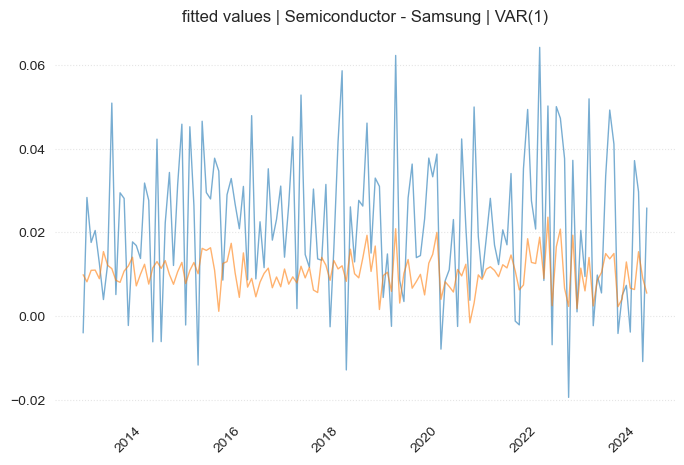

In [47]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    results.fittedvalues,
    alpha = 0.6,
    lw = 1
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title(r'fitted values | Semiconductor - Samsung | VAR(1)')
plt.show()

`plot_forecast()` method를 사용하면, 예측값을 확인할 수 있다

In [46]:
forecast_steps = 10
forecast, stderr, conf_int = results.forecast_interval(
    matrix_mon.values[-results.k_ar:], 
    steps=forecast_steps
)
forecast_index = pd.date_range(
    start=matrix_mon.index[-1], 
    periods=forecast_steps + 1, 
    freq='M'
)[1:]
forecast_df = pd.DataFrame(
    forecast, 
    index=forecast_index, 
    columns=['Semiconductor_forecast','Samsung_forecast']
)

lower_bounds = pd.DataFrame(
    forecast-conf_int, 
    index=forecast_index, 
    columns = matrix_mon.columns
)
upper_bounds = pd.DataFrame(
    forecast+conf_int, 
    index=forecast_index, 
    columns = matrix_mon.columns
)

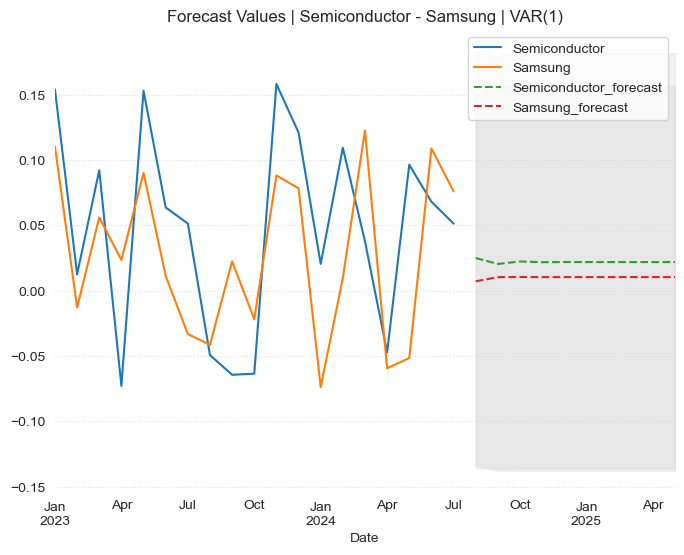

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
matrix_mon.loc['2023':].plot(ax=ax)
forecast_df.plot(ax=ax, style='--')

for col in matrix_mon.columns:
    ax.fill_between(forecast_index, lower_bounds[col], upper_bounds[col], color='lightgray', alpha=0.3)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)

plt.title(r'Forecast Values | Semiconductor - Samsung | VAR(1)')
plt.show()

`smvar()` 함수를 사용하면, information criterion을 기준으로 가장 적합한 모형을 자동으로 설계해 준다

In [49]:
import statsmodels.tsa.vector_ar.var_model as smvar
# Automatic VAR estimation
model_sm = smvar.VAR(matrix_mon)
results_smvar = model.fit(
    maxlags = 4, 
    method = 'ols', 
    ic = 'bic', 
    trend = 'c', 
    verbose = False
)

/Users/junghunlee/anaconda3/envs/FinancialMachineLearning/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
results_smvar.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jul, 2024
Time:                     23:35:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.9261
Nobs:                     139.000    HQIC:                  -10.9512
Log likelihood:           369.836    FPE:                1.72387e-05
AIC:                     -10.9684    Det(Omega_mle):     1.69934e-05
--------------------------------------------------------------------
Results for equation Semiconductor
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.022083         0.005925            3.727           0.000

Results for equation Samsung
           coefficient       std. error           t-stat            prob
------------------------------------------------------

#### Exercise 3

2013년 1월부터 2023년 6월까지의 KOSPI와 KOSDAQ의 index를 불러오라. 그리고 월별 수익률로 환산하라. $\mathrm{VAR}(2)$ 모형을 적용하라. 어떤 결과가 나오는가? 추정된 모형은 설명력이 있는가?

In [ ]:
# write your code there!

**1.6 Vector Moving Average models**


$\mathrm{VMA}(q)$ 모형은 다음과 같다


$$\mathbf{r}_t = \mathbf{\theta}_0 + \mathbf{a}_t - \mathbf{\Theta}_1\mathbf{a}_{t-1}-\cdots - \mathbf{\Theta}_q\mathbf{a}_{t-q}$$

$l>q$일 때 $\mathbf{\Gamma}_l = \mathbf{0}$이기 때문에, $\mathrm{VMA}(q)$의 cross-correlation matrix (CCMs)는 다음을 만족한다

$$\mathbf{\rho}_l = \mathbf{0}, ~~~~~ l>q$$

**1.7 Vector ARMA models**


$\mathrm{VARMA}(p,q)$ 모형은 다음과 같다

$$\mathbf{r}_t - \mathbf{\Phi}_1\mathbf{r}_{t-1} -\cdots-\mathbf{\Phi}_p\mathbf{r}_{t-p} = \mathbf{\phi}_{0} + \mathbf{a}_t - \mathbf{\Theta}_1\mathbf{a}_{t-1} - \cdots - \mathbf{\Theta}_q\mathbf{a}_{t-q}$$

#### example 4

아래의 데이터는 미국의 본원통화량(M2) 통계와 소비자지출(consumer expenditure) 통계이다. DataFrame 형태로 가공한 후, 가장 알맞은 형태의 order를 정하고 $\mathrm{VARMA}$ 모형을 적용하라

In [51]:
m2sl = pdr.get_data_fred(
    'M2SL',
    start = START_DATE,
    end = END_DATE
)
pce = pdr.get_data_fred(
    'PCE',
    start = START_DATE,
    end = END_DATE
)

In [52]:
fred = pd.concat([m2sl, pce], axis = 1).pct_change().dropna()

VARMA 차수를 정하기 위해서 ACF와 PACF의 plot을 확인해야 한다

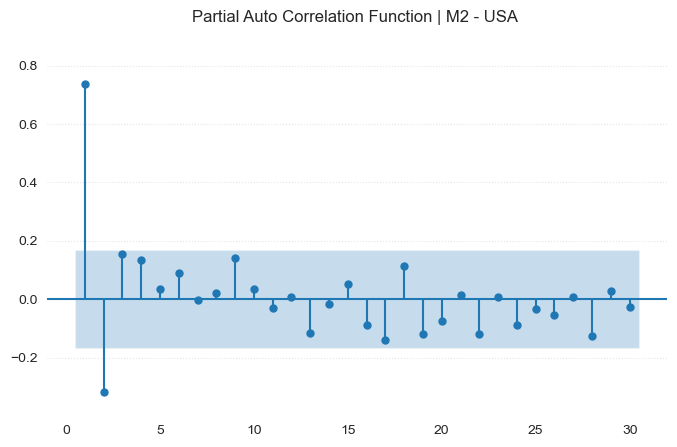

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize = (8, 5))
plot_pacf(
    m2sl.pct_change().dropna(), 
    auto_ylims = True, 
    lags = range(1, 31),
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.title(r'Partial Auto Correlation Function | M2 - USA ')
plt.show()

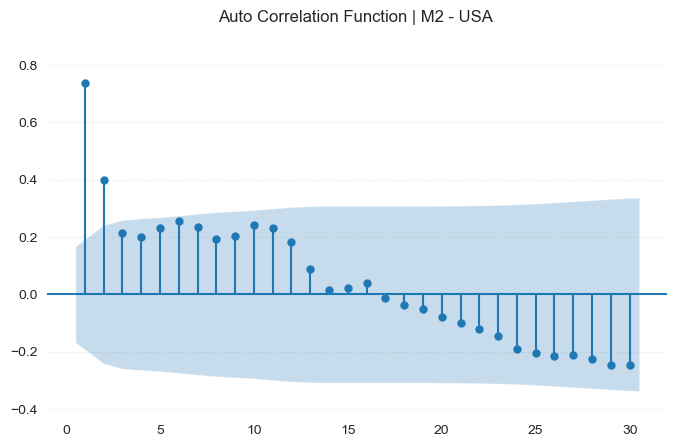

In [54]:
fig, ax = plt.subplots(figsize = (8, 5))
plot_acf(
    m2sl.pct_change().dropna(), 
    auto_ylims = True, 
    lags = range(1, 31),
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.title(r'Auto Correlation Function | M2 - USA ')
plt.show()

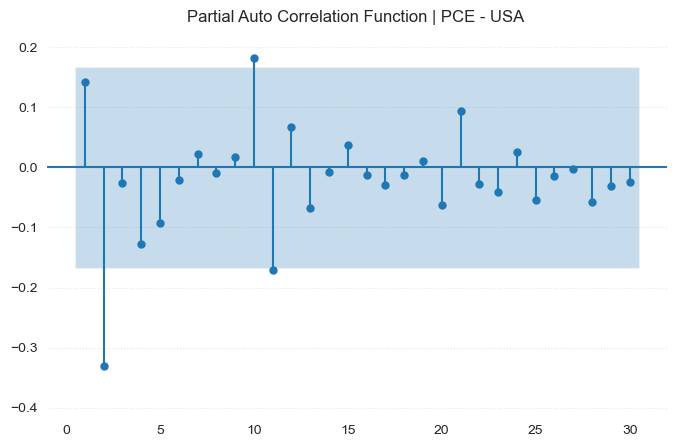

In [55]:
fig, ax = plt.subplots(figsize = (8, 5))
plot_pacf(
    pce.pct_change().dropna(), 
    auto_ylims = True, 
    lags = range(1, 31),
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.title(r'Partial Auto Correlation Function | PCE - USA ')
plt.show()

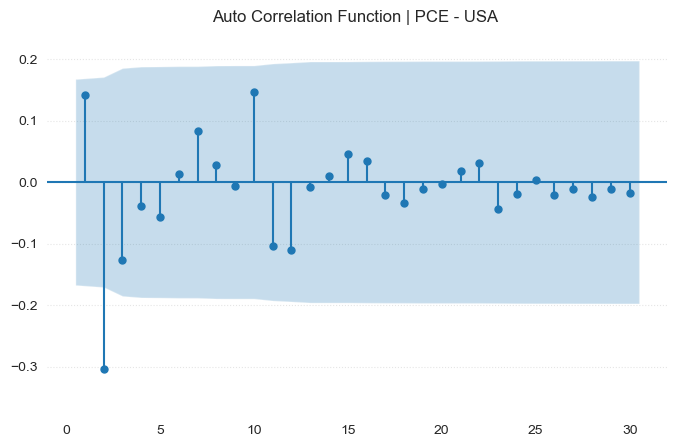

In [56]:
fig, ax = plt.subplots(figsize = (8, 5))
plot_acf(
    pce.pct_change().dropna(), 
    auto_ylims = True, 
    lags = range(1, 31),
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.title(r'Auto Correlation Function | PCE - USA ')
plt.show()

차수를 확인한 결과, 본원통화량에 대해서는 $\mathrm{ARMA(2,2)}$가, 소비자 지출에 대해서는 $\mathrm{ARMA(2,2)}$가 적합하다고 판단하였다. 두 시계열의 공통된 차수인 $\mathrm{VARMA(2,2)}$가 적합한 모형이라고 판단하였다

`VARMAX()` 함수를 통해 VARMA 모형을 적합화할 수 있다

In [58]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

model = sm.tsa.VARMAX(
    fred, 
    order = (2, 2)
)
results_varma = model.fit(maxiter = 50)
print(results_varma.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.14864D+00    |proj g|=  1.10259D+01


 This problem is unconstrained.



At iterate    5    f= -7.15063D+00    |proj g|=  5.44632D-01

At iterate   10    f= -7.15066D+00    |proj g|=  5.49074D-01

At iterate   15    f= -7.15087D+00    |proj g|=  3.60411D+00

At iterate   20    f= -7.15246D+00    |proj g|=  1.40741D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     23     33      1     0     0   3.930D-01  -7.153D+00
  F =  -7.1525157012090981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                           Statespace Model Results                           
Dep. Variable:        ['M2SL', 'PCE']   No. Observations:                  137
Model:           

$\mathrm{VARMA}$ 모형 또한 마찬가지로 `fittedvalues` attribute를 통해 적합화된 값을 확인할 수 있다

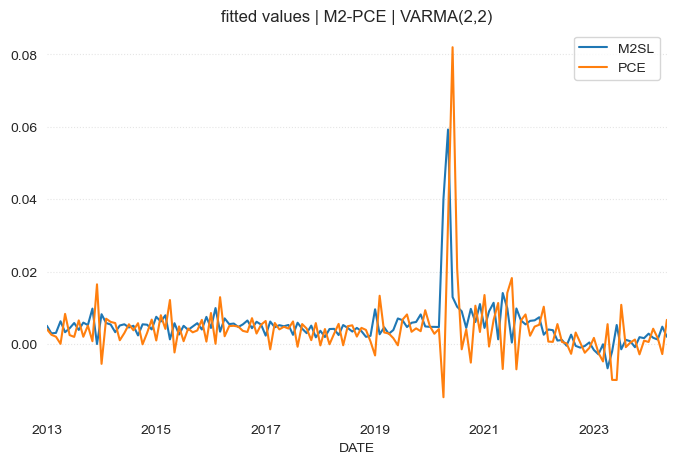

In [59]:
fig, ax = plt.subplots(figsize = (8, 5))
results_varma.fittedvalues.plot(
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.title(r'fitted values | M2-PCE | VARMA(2,2)')
plt.show()

#### 2. Impulse Response Function

충격반응함수(impulse response function)는 시계열 분석에서 사용되는 중요한 개념으로, 시간에 따라 시계열 변수가 다른 시계열 변수의 충격(shock)에 어떻게 반응하는지를 설명한다. 충격반응함수는 $\mathrm{VAR}$ 모델 또는 $\mathrm{VARMA}$ 모델과 같은 다변량 시계열 모델에서 자주 사용된다

충격반응함수는 특정 시계열 변수가 다른 변수에 대해 일시적인 변화가 발생할 때 어떤 패턴으로 반응하는지를 볼 수 있다

$\mathrm{VAR}(p)$ 모형이 있다고 생각하자

$$\mathbf{r}_t = \mathbf{\mu} + \mathbf{a}_t + \mathbf{\Psi}_1\mathbf{a}_{t-1} + \mathbf{\Psi}_2 \mathbf{a}_{t-2} + \mathbf{\Psi}_3 \mathbf{a}_{t-3} + \cdots $$

$$\begin{matrix}
\mathbf{r}_t &=& \mathbf{\mu} + \mathbf{a}_t + \mathbf{\Psi}_1\mathbf{a}_{t-1} + \mathbf{\Psi}_2 \mathbf{a}_{t-2} + \mathbf{\Psi}_3 \mathbf{a}_{t-3} + \cdots \\
       &=& \mathbf{\mu} + \mathbf{LL}^{-1}\mathbf{a}_t + \mathbf{\Psi}_1\mathbf{LL}^{-1}\mathbf{a}_{t-1} + \mathbf{\Psi}_2 \mathbf{LL}^{-1}\mathbf{a}_{t-2} + \mathbf{\Psi}_3 \mathbf{LL}^{-1}\mathbf{a}_{t-3} + \cdots \\
       &=& \mathbf{\mu} + \mathbf{\Psi}_0^*\mathbf{a}_t + \mathbf{\Psi}_1^*\mathbf{a}_{t-1} + \mathbf{\Psi}_2^* \mathbf{a}_{t-2} + \mathbf{\Psi}_3^* \mathbf{a}_{t-3} + \cdots
\end{matrix}$$

여기서 coefficient matrix $\mathbf{\Psi}_i^*$는 *impulse response function*(충격반응함수)라고 한다

#### example 5

example 3에서 추정한 $\mathrm{VAR}$ 모형에 대해서 충격반응 함수를 추정하고 시각화하라

$\mathrm{VAR}$ result의 `irt()` method를 사용하면 attribute에 넣은 숫자만큼의 충격 반응을 확인할 수 있다. irf에 대해서 plotting을 하면 변수별로 변수에 대해 충격이 전해진 결과를 볼 수 있다

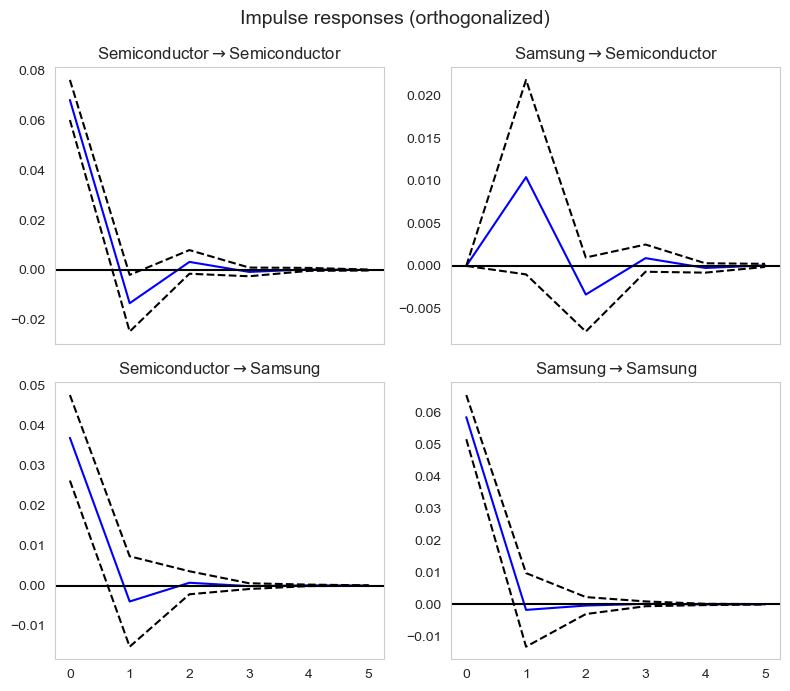

In [61]:
plt.rcParams['axes.grid'] = False
irf = results.irf(5)
irf.plot(orth = True, figsize = (8, 7))
plt.tight_layout()
plt.show()

impulse parameter에 변수를 써 넣으면 그 변수에 대한 충격만을 따로 볼 수 있다

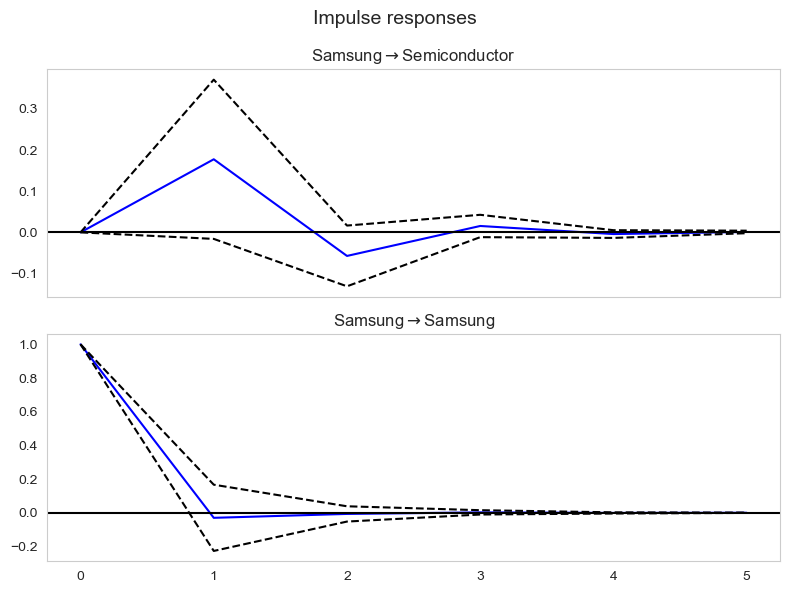

In [62]:
irf.plot(impulse = 'Samsung', figsize = (8,6))
plt.tight_layout()
plt.show()

#### 3. Granger Causality

Granger Causality test는 한 시계열이 다른 시계열의 예측에 유용한지를 결정하기 위한 통계적 가설 검정 방법으로, 1969년 처음 제안되었다. 일반적으로 회귀분석은 단순한 상관관계를 반영하지만, Clive Granger는 경제학에서 원인관계를 검정하기 위해 다른 시계열의 이전 값들을 사용하여 시계열의 미래 값을 예측하는 능력을 측정할 수 있다고 주장하였다.
무언가가 다른 것보다 앞서는 것을 원인으로 가정하는 사후사건의 논리적 오류 때문에, 계량경제학자들은 Granger Causality test가 예측 원인관계만을 찾는다고 주장한다. 죽, X가 Y를 야기하는지를 검정하는 것이 아니라 X가 Y를 예측하는지를 테스트하는 것이다.

시계열 X가 Y를 Granger-Causaliry로 판명하는 경우, 일반적으로 X의 지연값에 대한 t-검정과 F-검정을 통해 (Y의 지연값도 포함하여) X 값이 Y의 미래 값을 통계적으로 유의한 정보를 제공하는지를 보여준다.
계산적으로 간단한 특징 때문에 시계열에서 원인관계 분석을 위한 방법으로 사용되고 있다


> 만약 시계열 변수 X의 과거 값과 변수 Y의 과거 값들을 기반으로 Y의 값을 예측하는 경우, 오직 Y의 과거 값들만을 사용하여 Y의 값을 예측하는 경우보다 변수 X가 변수 Y에 대한 예측을 더 잘할 때, 변수 X가 변수 Y를 Granger-Causality를 띈다고 한다

**3.1 Causality**

Granger는 인과관계를 다음 두 가지 원식을 기반으로 정의하였다

1. 원인은 결과보다 먼저 발생한다
2. 원인은 결과의 미래 값에 대한 특별한 정보를 가지고 있다

이러한 가정을 바탕으로 Granger는 $X$가 $Y$의 원인이 되는지 확인하기 위한 가설을 검정하는 것을 제안하였다

$$\mathbf{H_0} : \mathbb{P}[Y(t+1) \in A | \mathcal{I}(t)] = \mathbb{P}[Y(t+1) \in A | \mathcal{I}_{-X}(t)]$$
$$\mathbf{H_1} : \mathbb{P}[Y(t+1) \in A | \mathcal{I}(t)] \neq \mathbb{P}[Y(t+1) \in A | \mathcal{I}_{-X}(t)]$$

여기서 $\mathbb{P}$는 확률을 의미하고, $A$는 임의의 비어 있지 않은 집합, 그리고 $\mathcal{I}(t)$와 $\mathcal{I}_{-X}(t)$는 각각 전체 universe와 $X$가 제외된 universe에서 사용할 수 있는 정보를 나타낸다. 만약 위의 가설이 받아들여지면, 이를 보고 $X$가 $Y$는 Granger 인과성이 성립한다고 한다

#### example 6

yahoo finance에서 티커 CL=F는 미국 서부 텍사스 중질유(WTI)의 선물 가격을 기록한 데이터이다. 2022년 1월 1일부터 현재까지 WTI선물 가격과 KOSPI지수는 어떤 관계가 있는가? 두 시계열은 Granger Causality를 보이는가? Granger Causality Test를 위해 다음 가설을 검정하라

$$\mathrm{H}_0 : \mathrm{WTI/USD ~does ~not ~Granger-cause ~KOSPI}$$

만약 Granger Causality를 보이지 않는다면 그 이유는 무엇인가?

In [65]:
START_DATE = '2022-01-01'

wti = yf.download(
    'CL=F',
    start = START_DATE,
    end = END_DATE,
    progress = False,
    interval = '1d'
)
kospi = yf.download(
    '^KS11',
    start = START_DATE,
    end = END_DATE,
    progress = False,
    interval = '1d'
)

분석을 위해 WTI price와 KOSPI를 차분 시계열 데이터로 변환해 준다

In [66]:
wti_ret = wti['Close'].pct_change().dropna()
kospi_ret = kospi['Close'].pct_change().dropna()

추정을 위해 Matrix를 생성한다

In [68]:
matrix = pd.concat([wti_ret, kospi_ret], axis = 1).dropna()
matrix.columns = ['WTI futures','KOSPI']
matrix

,WTI futures,KOSPI
Date,,
2022-01-05,0.011170,-0.011799
2022-01-06,0.020681,-0.011320
2022-01-07,-0.007048,0.011765
2022-01-10,-0.008492,-0.009533
2022-01-11,0.038221,0.000225
...,...,...
2024-07-09,-0.011175,0.003366
2024-07-10,0.008476,0.000213
2024-07-11,0.006334,0.008145


In [72]:
from statsmodels.tsa.api import VAR

model = VAR(matrix)
results = model.fit(1, trend = 'c')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jul, 2024
Time:                     23:42:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.5190
Nobs:                     597.000    HQIC:                  -16.5459
Log likelihood:           3255.88    FPE:                6.40813e-08
AIC:                     -16.5631    Det(Omega_mle):     6.34421e-08
--------------------------------------------------------------------
Results for equation WTI futures
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.000321         0.000970            0.331           0.740
L1.WTI futures         0.013296         0.041141            0.323           0.747
L1.KOSPI               0.036773         0.090796  

VAR(1)모형을 이용해 추정을 해 준다

In [74]:
# Granger-causality test
gctest = results.test_causality('KOSPI', 'WTI futures', kind = 'wald')
print(gctest.summary())

Granger causality Wald-test. H_0: WTI futures does not Granger-cause KOSPI. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         6.383          3.841   0.012  1
----------------------------------------


result에 대해 granger causality를 추정한 결과 미국 서부 텍사스 중질유 선물가격은 KOSPI index에 대해 Granger 인과관계를 보이는 것으로 나타났다

여기서 주의할 점은, 인과성이 보장된다는 것이 아닌 KOSPI의 가격 움직임을 예측하는데 WTI/USD의 변동을 이용해 예측하는 것이 설득력이 있다는 것이다

#### Exercise 4

KOSPI 혹은 NASDAQ, NIKKEI 상장 회사 중 하나를 선정하여 미국 서부 텍사스 중질유 선물가격(CL=F)를 포함하는 VAR모형을 추정하라. 그리고 아래의 가설을 검증하라

$$\mathrm{H}_0 : \mathrm{WTI/USD ~does ~not ~Granger-cause ~} \mathbf{Asset_i}$$

Granger 인과관계가 보이는가? 만약 보이지 않는다면 무슨 이유에서인가?